In [1]:
#installation
!pip install emoji
!pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 356.6/356.6 kB 2.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for emoji: filename=emoji-2.6.0-py2.py3-none-any.whl size=351311 sha256=84fab81b441cfb793639ec6e066b7ee50d16e72a867c3009a0d32511092a68e7
  Stored in directory: /root/.cache/pip/wheels/ea/0b/64/114bc939d0083621aa41521e21be246c888260b8aa21e6c1ad
Successfully built emoji
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 17.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 17.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 45.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 59.4 MB/s eta 0:00:00


In [2]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import emoji
import re
import seaborn as sns
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay


In [4]:
#read data
train = pd.read_csv('twitter_training.csv', names=['Id', 'Entity', 'Sentiment', 'Text'])
test = pd.read_csv('twitter_validation.csv', names=['Id', 'Entity', 'Sentiment', 'Text'])

In [5]:
train.head()

,Id,Entity,Sentiment,Text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [6]:
test.head()

,Id,Entity,Sentiment,Text
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...


In [7]:
#missing columns
train.isna().sum()

Id             0
Entity         0
Sentiment      0
Text         686
dtype: int64

In [8]:
#missing columns
test.isna().sum()

Id           0
Entity       0
Sentiment    0
Text         0
dtype: int64

In [9]:
#drop missing rows
train.dropna(inplace=True)
test.dropna(inplace=True)

In [10]:
#number of duplicated rows
train.duplicated().sum(), test.duplicated().sum()

(2340, 0)

In [11]:
#drop duplicated rows
train.drop_duplicates(inplace=True)

In [12]:
#number of samples in the train-test set
train.shape, test.shape

((71656, 4), (1000, 4))

#**EDA**

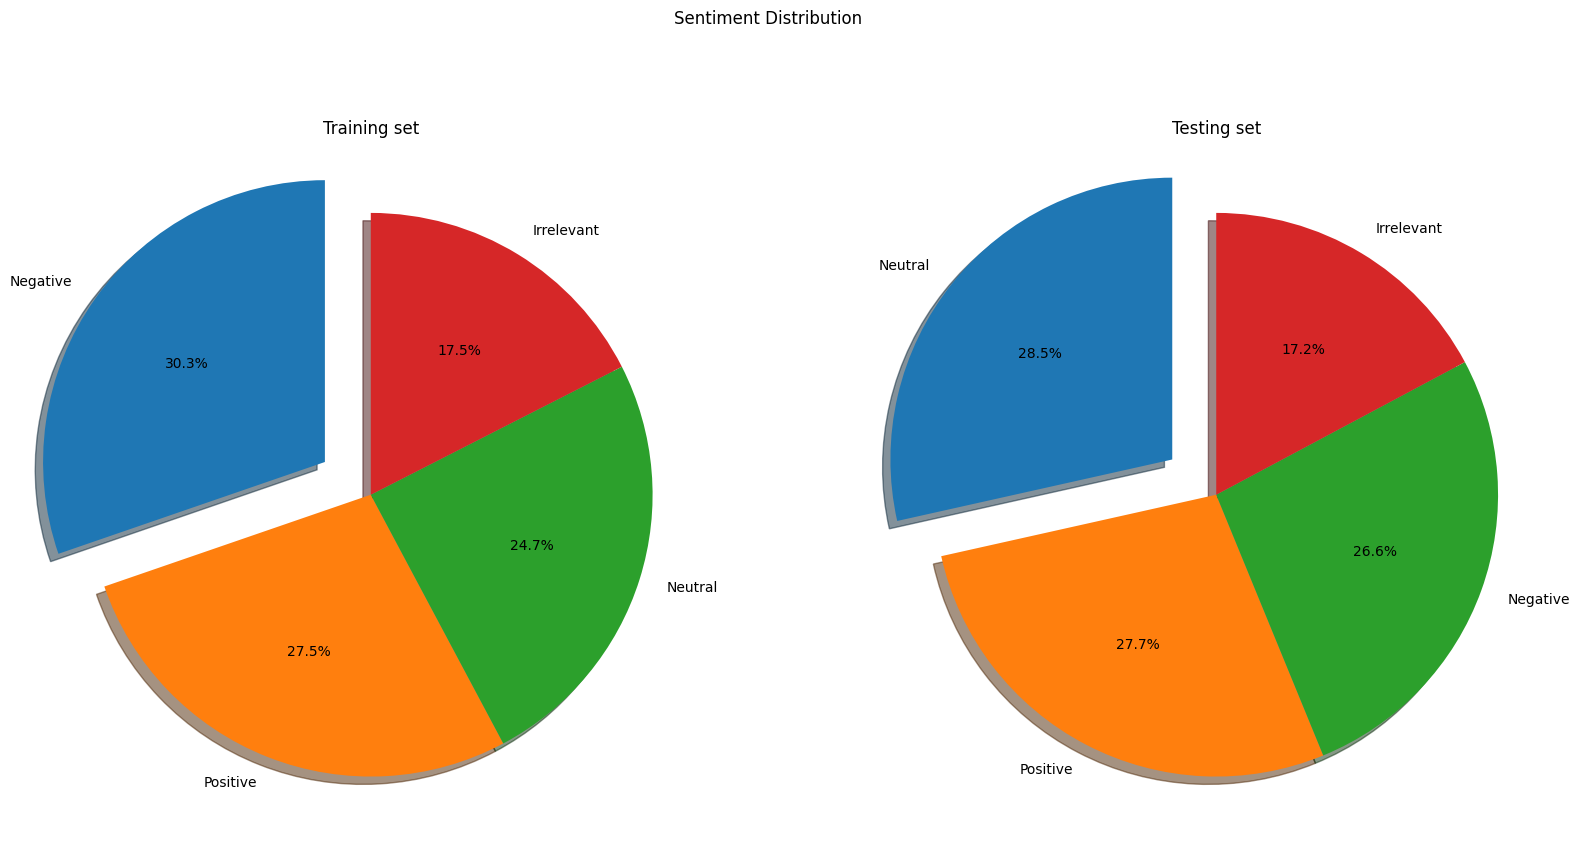

In [ ]:
# Calculate counts of the Sentiment column
senti_count_train = dict(train['Sentiment'].value_counts())
senti_count_test = dict(test['Sentiment'].value_counts())

senti_explode = [0.2, 0, 0, 0]

# Create a pie chart
fig,ax = plt.subplots(1, 2, figsize=(20, 10))
ax[0].pie(list(senti_count_train.values()), labels=list(senti_count_train.keys()), startangle = 90,
        autopct='%1.1f%%', explode=senti_explode, shadow = True)
ax[1].pie(list(senti_count_test.values()), labels=list(senti_count_test.keys()), startangle = 90,
        autopct='%1.1f%%', explode=senti_explode, shadow = True)

ax[0].set_title('Training set')
ax[1].set_title('Testing set')
fig.suptitle('Sentiment Distribution')
plt.show()

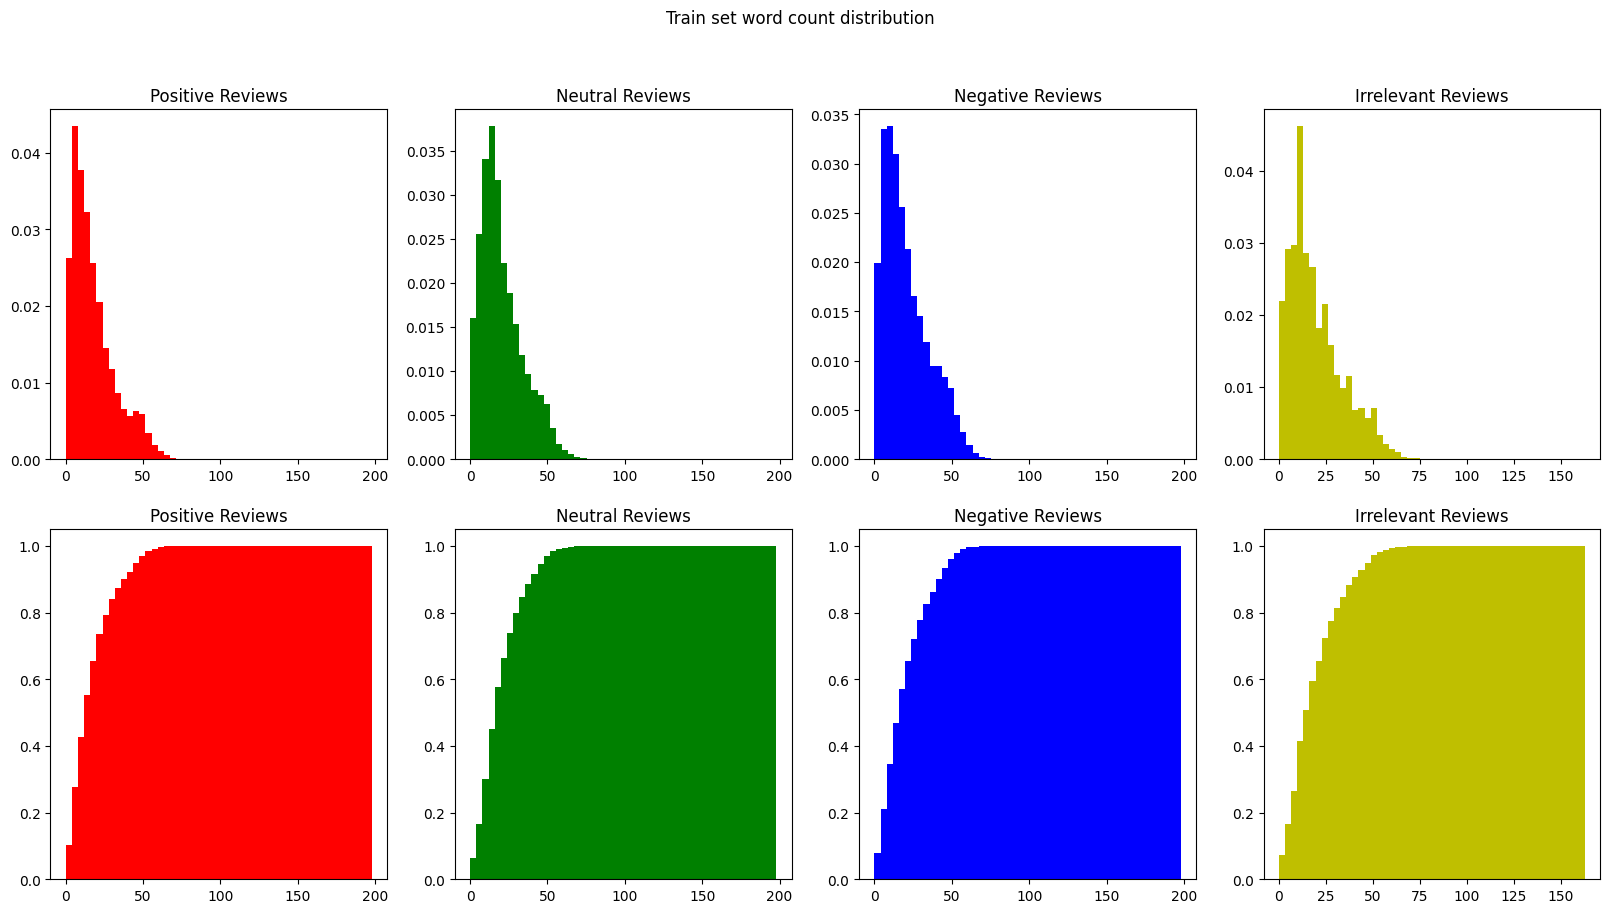

In [ ]:
# Create a histogram chart
fig, axis = plt.subplots(2,4,figsize=(20,10))

colors = ['r', 'g', 'b', 'y', 'r', 'g', 'b', 'y']
sentiments = ['Positive', 'Neutral', 'Negative', 'Irrelevant',
              'Positive', 'Neutral', 'Negative', 'Irrelevant']

i = 1
for sentiment,ax,c in zip(sentiments, axis.flatten(), colors):
  if i <= 4:
    ax.hist(train[train['Sentiment'] == sentiment]['Text'].str.split().map(lambda x: len(x)),
              density=True, bins=50, color=c)
    ax.set_title('{} Reviews'.format(sentiment))
  else:
    ax.hist(train[train['Sentiment'] == sentiment]['Text'].str.split().map(lambda x: len(x)),
              cumulative=True, density=True, bins=50, color=c)
    ax.set_title('{} Reviews'.format(sentiment))
  i += 1


#add title
_ = fig.suptitle('Train set word count distribution')

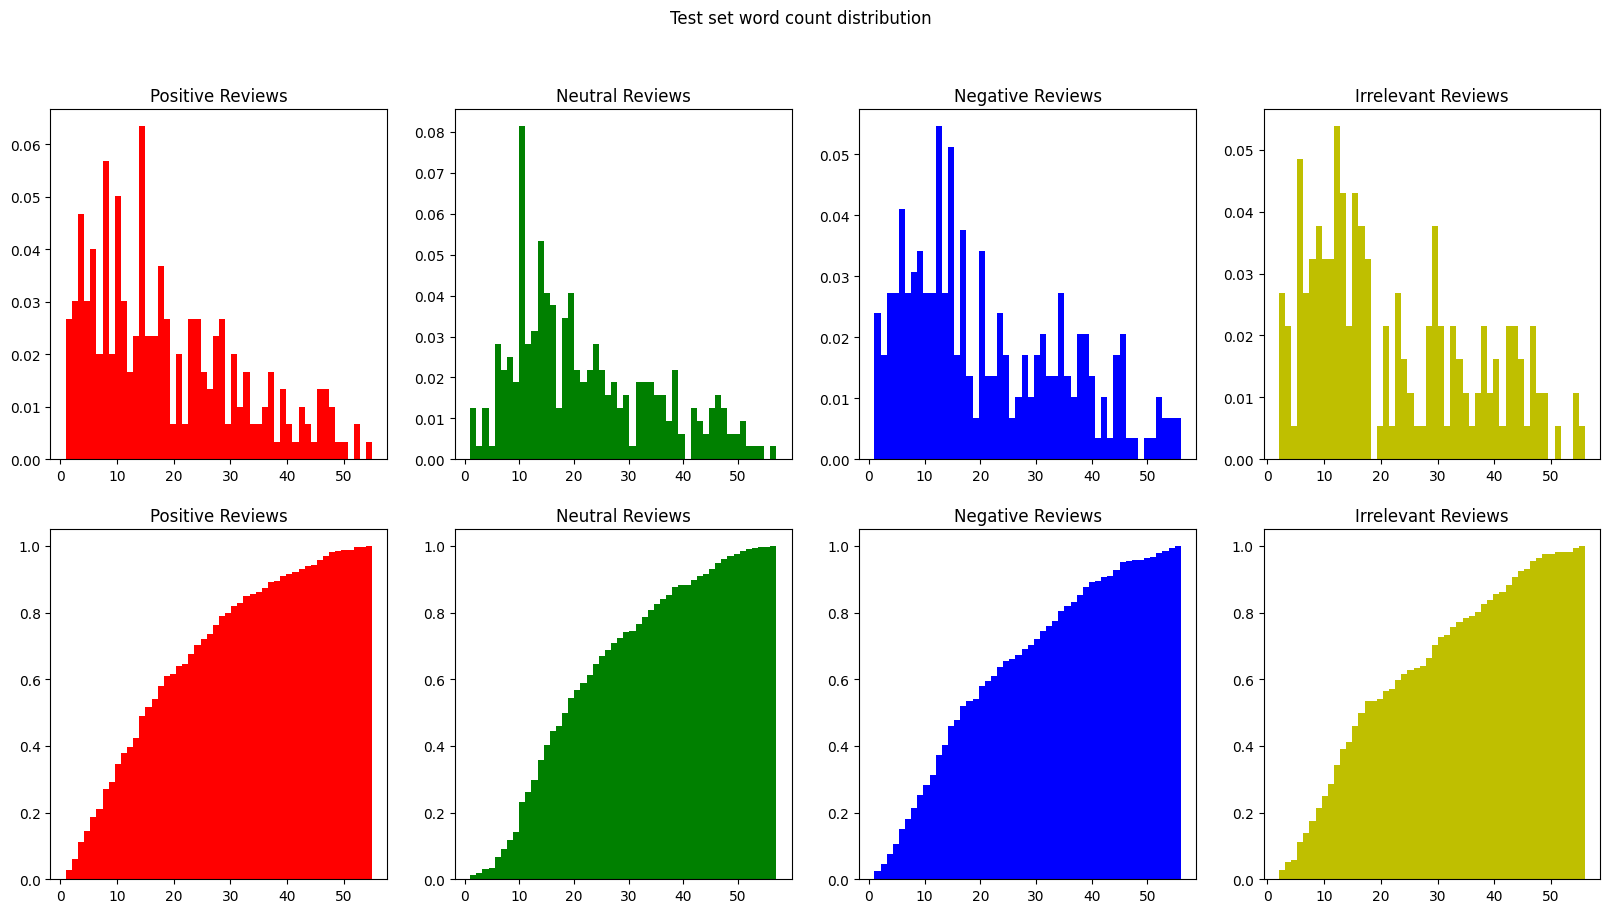

In [ ]:
# Create a histogram chart
fig, axis = plt.subplots(2,4,figsize=(20,10))

colors = ['r', 'g', 'b', 'y', 'r', 'g', 'b', 'y']
sentiments = ['Positive', 'Neutral', 'Negative', 'Irrelevant',
              'Positive', 'Neutral', 'Negative', 'Irrelevant']

i = 1
for sentiment,ax,c in zip(sentiments, axis.flatten(), colors):
  if i <= 4:
    ax.hist(test[test['Sentiment'] == sentiment]['Text'].str.split().map(lambda x: len(x)),
              density=True, bins=50, color=c)
    ax.set_title('{} Reviews'.format(sentiment))
  else:
    ax.hist(test[test['Sentiment'] == sentiment]['Text'].str.split().map(lambda x: len(x)),
              cumulative=True, density=True, bins=50, color=c)
    ax.set_title('{} Reviews'.format(sentiment))
  i += 1

#add title
_ = fig.suptitle('Test set word count distribution')

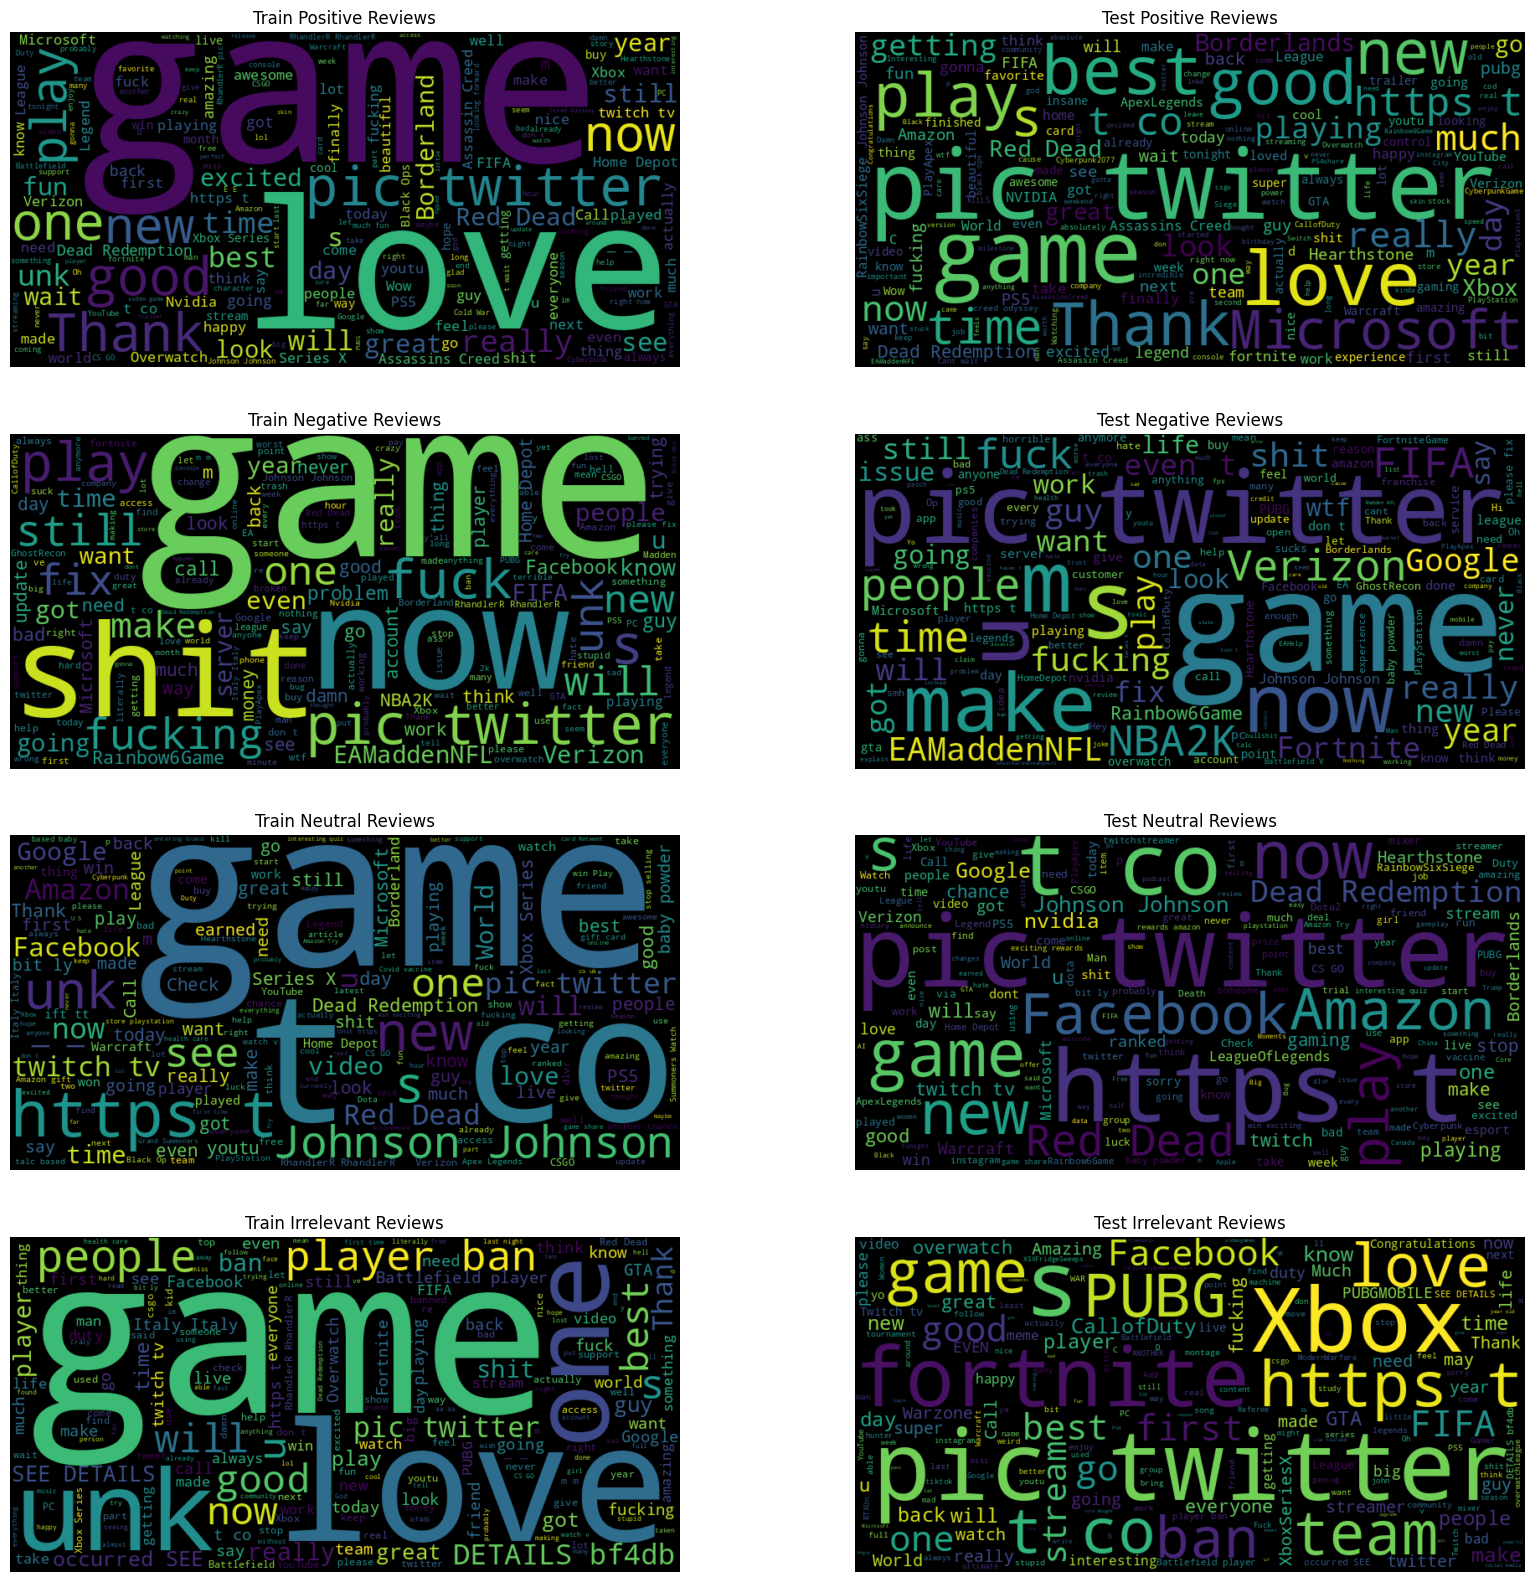

In [ ]:
#create a wordcloud
fig, axis = plt.subplots(4,2, figsize=(20,20))

sentiments = ['Positive', 'Positive', 'Negative', 'Negative',
              'Neutral', 'Neutral', 'Irrelevant', 'Irrelevant']


i = 1
for sentiment,ax in zip(sentiments, axis.flatten()):
  if i%2:          #train-set plot
    wordcloud = WordCloud(width=800, height=400).generate(' '.join(train[train["Sentiment"] == sentiment]["Text"]))
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.axis('off')
    ax.set_title('Train {} Reviews'.format(sentiment))

  else:              #test-set plot
    wordcloud = WordCloud(width=800, height=400).generate(' '.join(test[test["Sentiment"] == sentiment]["Text"]))
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.axis('off')
    ax.set_title('Test {} Reviews'.format(sentiment))
  i += 1


In [ ]:
#emojis count
def EmojiCount(text):
    emoji_list = []
    for word in text.split(' '):
        emojis = emoji.distinct_emoji_list(word)
        if len(emojis):
          emoji_list.extend([emoji.demojize(is_emoji) for is_emoji in emojis])
    return emoji_list


sentimentwise_emojicount = {'Positive': [], 'Neutral': [], 'Negative': [], 'Irrelevant' : []}

for i, text in enumerate(train['Text']):
    emoji_count = EmojiCount(text)
    if emoji_count:
        emoji_count = [re.sub(re.compile('\u200d'), '', e) for e in emoji_count]
        sentimentwise_emojicount[train['Sentiment'].iloc[i]].extend(emoji_count)

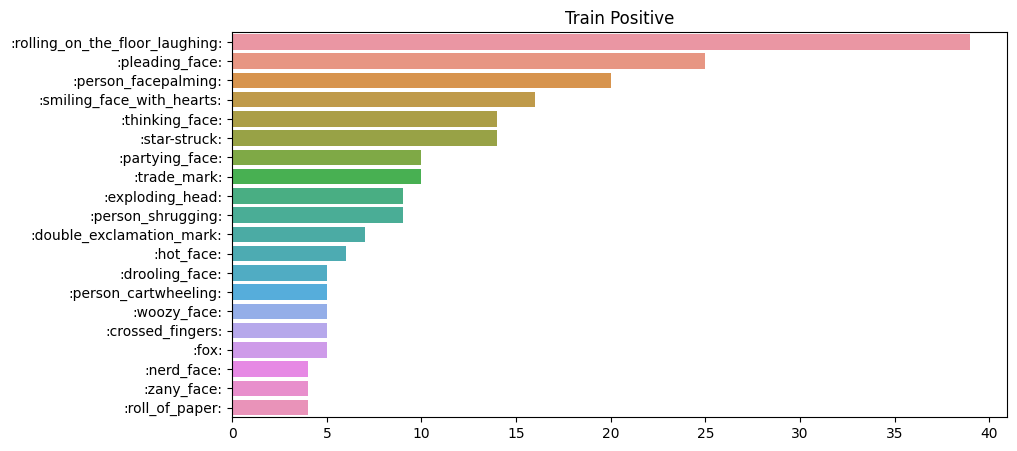

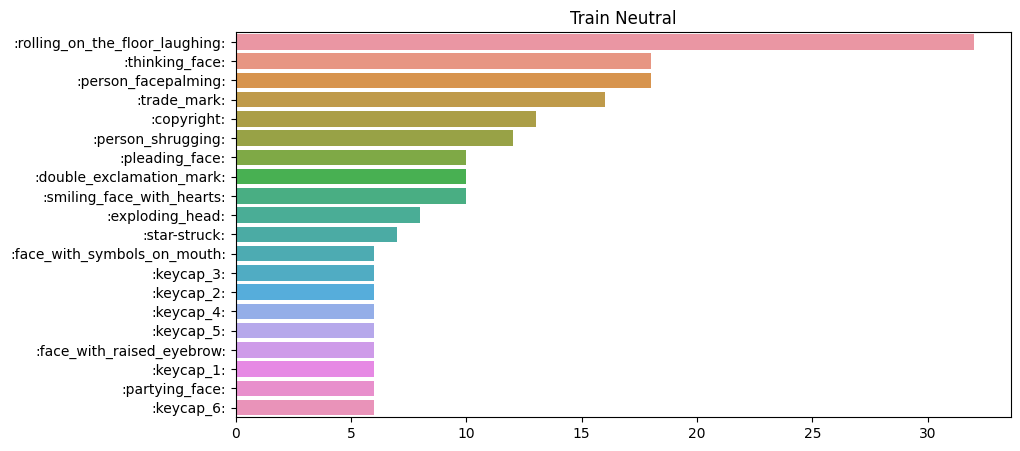

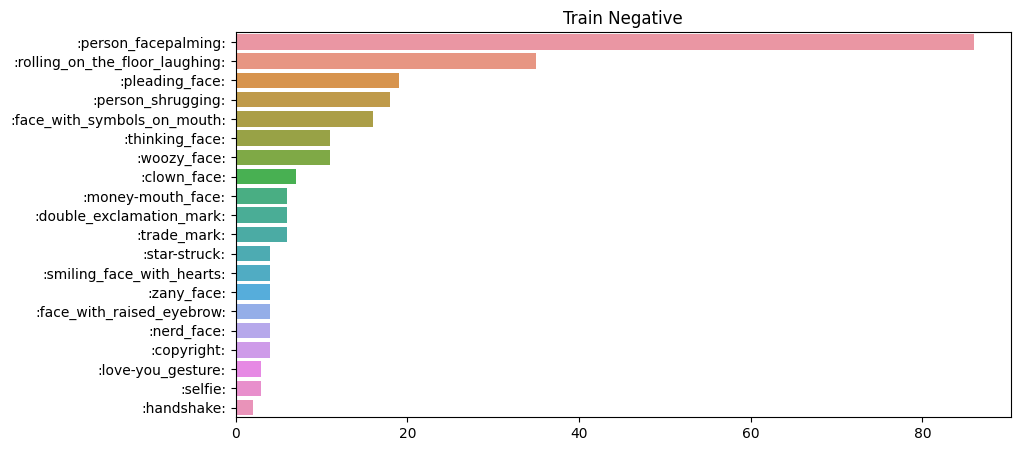

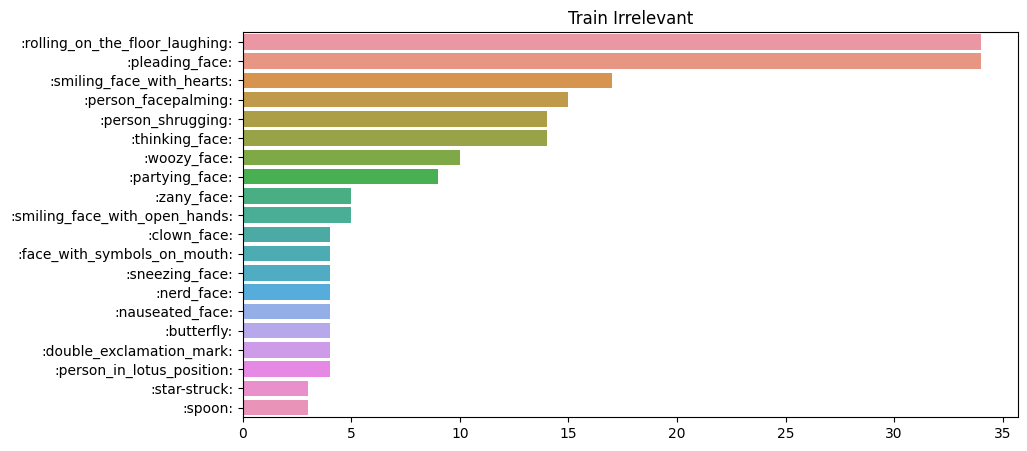

In [ ]:
for t, emojis in sentimentwise_emojicount.items():

    plt.figure(figsize=(10, 5))
    barh_ = pd.Series(emojis).value_counts()[:20]
    barh_.index = [emoji.demojize(i, delimiters=("", "")) for i in barh_.index]
    sns.barplot(x=barh_.values, y=barh_.index)

    plt.title('Train {}'.format(t))
    plt.show()

#**LSTM**

In [ ]:
#import libraries
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Dropout, Embedding, LSTM, GlobalMaxPooling1D, SpatialDropout1D
from sklearn.model_selection import train_test_split

In [ ]:
#download nltk dependencies
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
#english stopwords
en_stop_words = stopwords.words('english')

In [ ]:
replace_list = {r"i'm": 'i am',  r"'re": ' are',  r"let’s": 'let us',  r"'s":  ' is',
                r"'ve": ' have',  r"can't": 'can not',  r"cannot": 'can not',
                r"shan’t": 'shall not',  r"n't": ' not',  r"'d": ' would',
                r"'ll": ' will',  r"'scuse": 'excuse',
                ',': ' ,',  '.': ' .',  '!': ' !',  '?': ' ?',  '\s+': ' '}

#clean text by replacing and lowercasing words
def replace_text(text):
    for s in replace_list:
        text = text.replace(s, replace_list[s])
    return ' '.join(text.split())


train_x = train['Text'].apply(lambda p: replace_text(p.lower()))
test_x = test['Text'].apply(lambda p: replace_text(p.lower()))

In [ ]:
#remove '@' from text
def reviews(reviews):
    reviews = [re.compile("(@)").sub(" ", line.lower()) for line in reviews]
    return reviews

#remove stopwords
def remove_stop_words(text):
    removed_stopwords = []
    for review in text:
        removed_stopwords.append(
            ' '.join([word for word in review.split()  if word not in en_stop_words]))
    return removed_stopwords

#remove suffix from the text
def text_Stemming(text):
    stemmer = PorterStemmer()
    return [' '.join([stemmer.stem(word) for word in review.split()]) for review in text]


cleaned_train_x = text_Stemming(remove_stop_words(reviews(train_x)))
cleaned_test_x = text_Stemming(remove_stop_words(reviews(test_x)))

In [ ]:
#train-test label
train_y =train['Sentiment']
test_y =test['Sentiment']

In [ ]:
#tokenize text and keep 8000 most frequent words
tokenizer = Tokenizer(8000, filters = '"#$%&()*+-/:;<=>@[\]^_`{|}~')

#fit on the train-set
tokenizer.fit_on_texts(cleaned_train_x)

#train-test tokeniation
cleaned_train_x = pad_sequences(tokenizer.texts_to_sequences(cleaned_train_x), maxlen = 200)
cleaned_test_x = pad_sequences(tokenizer.texts_to_sequences(cleaned_test_x), maxlen = 200)

In [ ]:
#label encoder
label_tokenizer = Tokenizer()
label_tokenizer.fit_on_texts(train_y)

train_enc_y = np.array(label_tokenizer.texts_to_sequences(train_y))
test_encoding_y = np.array(label_tokenizer.texts_to_sequences(test_y))

In [ ]:
#split into train-val set
x_train, x_val, y_train, y_val = train_test_split(cleaned_train_x, train_enc_y, train_size = 0.8,
                                                  stratify=train_enc_y)

In [ ]:
#create a LSTM model

model_lstm = Sequential()
#to embed words
model_lstm.add(Embedding(input_dim = 8000, output_dim = 128, input_length = 200))
model_lstm.add(SpatialDropout1D(0.3))
#LSTM layer
model_lstm.add(LSTM(128, dropout = 0.3, recurrent_dropout = 0.3))
#hidden layer
model_lstm.add(Dense(128, activation = 'relu'))
model_lstm.add(Dropout(0.3))
#output layer
model_lstm.add(Dense(5, activation = 'softmax'))
model_lstm.compile( loss='sparse_categorical_crossentropy', optimizer='Adam',metrics=['accuracy'])
model_lstm.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 128)          1024000   
                                                                 
 spatial_dropout1d (SpatialD  (None, 200, 128)         0         
 ropout1D)                                                       
                                                                 
 lstm (LSTM)                 (None, 128)               131584    
                                                                 
 dense (Dense)               (None, 128)               16512     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 5)                 645       
                                                        

In [ ]:
#callbacks

#to save best model weights
weight_path="/content/drive/MyDrive/TwitterSentiment/lstm_.hdf5"
checkpoint = ModelCheckpoint(weight_path, monitor='val_loss', verbose=1,
                             save_best_only=True, mode='min', save_weights_only = True)

#reduce learning rate
reduceLROnPlat = ReduceLROnPlateau(monitor='val_loss', factor=0.8, patience=3, verbose=1, mode='auto', epsilon=0.0001,
                                   cooldown=5, min_lr=0.000001)

#to stop overfitting
early = EarlyStopping(monitor="val_loss",  mode="min", patience=5)
callbacks_list = [checkpoint, reduceLROnPlat]

In [ ]:
history = model_lstm.fit(x_train, y_train,
    validation_data=(x_val,y_val) ,
    epochs = 15, batch_size = 512,
    callbacks=callbacks_list)

Epoch 1/15
112/112 [==============================] - ETA: 0s - loss: 1.2816 - accuracy: 0.4125
Epoch 1: val_loss improved from inf to 1.00639, saving model to /content/drive/MyDrive/TwitterSentiment/lstm_.hdf5
112/112 [==============================] - 566s 5s/step - loss: 1.2816 - accuracy: 0.4125 - val_loss: 1.0064 - val_accuracy: 0.5845 - lr: 0.0010
Epoch 2/15
112/112 [==============================] - ETA: 0s - loss: 0.8797 - accuracy: 0.6548
Epoch 2: val_loss improved from 1.00639 to 0.77805, saving model to /content/drive/MyDrive/TwitterSentiment/lstm_.hdf5
112/112 [==============================] - 568s 5s/step - loss: 0.8797 - accuracy: 0.6548 - val_loss: 0.7781 - val_accuracy: 0.6970 - lr: 0.0010
Epoch 3/15
112/112 [==============================] - ETA: 0s - loss: 0.6900 - accuracy: 0.7370
Epoch 3: val_loss improved from 0.77805 to 0.70305, saving model to /content/drive/MyDrive/TwitterSentiment/lstm_.hdf5
112/112 [==============================] - 566s 5s/step - loss: 0.690

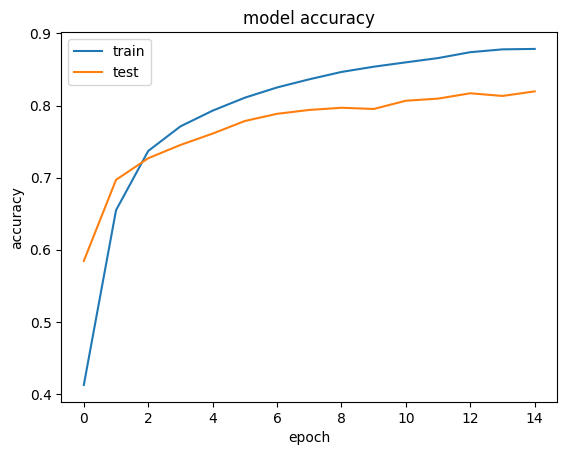

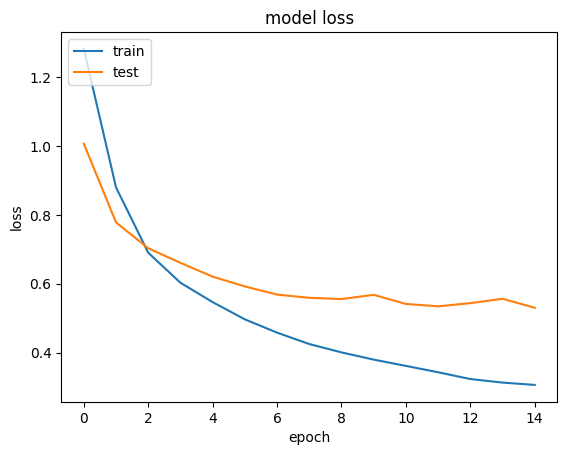

In [ ]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
model_lstm.load_weights('/content/drive/MyDrive/TwitterSentiment/lstm_.hdf5')

In [ ]:
#label mapping
label_map = {1:'Negative', 2:'Positive', 3:'Neutral', 4:'Irrelevant'}

In [ ]:
#prediction on the unseen data
predictions = model_lstm.predict(x_val)
predicted_labels = np.argmax(predictions, axis=1)

448/448 [==============================] - 40s 87ms/step


In [ ]:
predicted_labels = [label_map[val] for val in predicted_labels]
encoding_label = [label_map[val[0]] for val in y_val]

In [ ]:
#classification report for the test set
print("Test Set - Classification Report:\n", classification_report(predicted_labels, encoding_label))

Test Set - Classification Report:
               precision    recall  f1-score   support

  Irrelevant       0.83      0.93      0.88      2221
    Negative       0.91      0.92      0.91      4269
     Neutral       0.90      0.91      0.90      3520
    Positive       0.92      0.84      0.88      4322

    accuracy                           0.89     14332
   macro avg       0.89      0.90      0.89     14332
weighted avg       0.90      0.89      0.89     14332



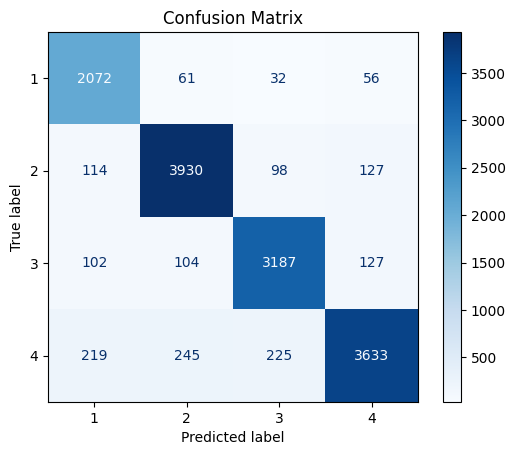

In [ ]:
#plot confusion matrix for the test set
confusion_mat = confusion_matrix(predicted_labels, encoding_label)

train_display = ConfusionMatrixDisplay(confusion_matrix=confusion_mat, display_labels=list(label_map.keys()))
train_display.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.grid(False)
plt.show()

In [ ]:
#print few predictions
for i,text in enumerate(test['Text'][:5]):
  print("Text:\n", text)
  print("Actual: {} \t\t\t Prediction: {}".format(encoding_label[i],
                                                        predicted_labels[i]))
  print("#####################################################################\n\n")


Text:
 I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣
Actual: Irrelevant 			 Prediction: Irrelevant
#####################################################################


Text:
 BBC News - Amazon boss Jeff Bezos rejects claims company acted like a 'drug dealer' bbc.co.uk/news/av/busine…
Actual: Neutral 			 Prediction: Neutral
#####################################################################


Text:
 @Microsoft Why do I pay for WORD when it functions so poorly on my @SamsungUS Chromebook? 🙄
Actual: Negative 			 Prediction: Negative
#####################################################################


Text:
 CSGO matchmaking is so full of closet hacking, it's a truly awful game.
Actual: Negative 			 Prediction: Negative
#####################################################################

# **BERT**

In [13]:
#import libraries
from sklearn.model_selection import train_test_split
import tensorflow as tf
from transformers import TFBertModel, BertTokenizer
import warnings
warnings.filterwarnings("ignore")

In [14]:
#load model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = TFBertModel.from_pretrained('bert-base-uncased')

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

In [15]:
#load train-test data
data_train = train[['Text', 'Sentiment']]
data_test = test[['Text', 'Sentiment']]

#label mapping
label_map = {'Positive':1, 'Neutral':2, 'Negative':3, 'Irrelevant':4}
reverse_label_map = {v:k for k,v in label_map.items()}

#encode labels
data_train['Sentiment'] = data_train['Sentiment'].apply(lambda x : label_map[x])
data_test['Sentiment'] = data_test['Sentiment'].apply(lambda x : label_map[x])

In [16]:
#split into train-val set
x_train, x_val, y_train, y_val = train_test_split(data_train['Text'], data_train['Sentiment'],
                                                  test_size = 0.2, stratify=data_train['Sentiment'])

In [17]:
# text tokenization
train_encodings = tokenizer(list(x_train), truncation=True, padding=True, max_length=128)
valid_encodings = tokenizer(list(x_val), truncation=True, padding=True, max_length=128)
test_encodings = tokenizer(data_test['Text'].to_list(), truncation=True, padding=True, max_length=128)

In [18]:
#create one-hot encoded vector of labels
train_labels_encoded = tf.one_hot(y_train, 4)
test_labels_encoded = tf.one_hot(data_test['Sentiment'], 4)
val_labels_encoded = tf.one_hot(y_val, 4)

In [19]:
# datasets object of tensorflow
train_dataset = tf.data.Dataset.from_tensor_slices((dict(train_encodings), train_labels_encoded))
test_dataset = tf.data.Dataset.from_tensor_slices((dict(test_encodings), test_labels_encoded))
valid_dataset = tf.data.Dataset.from_tensor_slices((dict(valid_encodings), val_labels_encoded))

In [20]:
#add input and output layer to the BERT model

input_ids = tf.keras.layers.Input(shape=(128,), dtype=tf.int32, name='input_ids')
attention_mask = tf.keras.layers.Input(shape=(128,), dtype=tf.int32, name='attention_mask')
output = model(input_ids, attention_mask=attention_mask)[0]
output = tf.keras.layers.Dense(4, activation='softmax')(output[:, 0, :])

Bert_model = tf.keras.Model(inputs=[input_ids, attention_mask], outputs=output)
Bert_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_ids (InputLayer)         [(None, 128)]        0           []                               
                                                                                                  
 attention_mask (InputLayer)    [(None, 128)]        0           []                               
                                                                                                  
 tf_bert_model (TFBertModel)    TFBaseModelOutputWi  109482240   ['input_ids[0][0]',              
                                thPoolingAndCrossAt               'attention_mask[0][0]']         
                                tentions(last_hidde                                               
                                n_state=(None, 128,                                           

In [21]:
#compile model
Bert_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [22]:
#callbacks

#to save best model weights
weight_path="/content/drive/MyDrive/TwitterSentiment/bert_.hdf5"
checkpoint = ModelCheckpoint(weight_path, monitor='val_loss', verbose=1,
                             save_best_only=True, mode='min', save_weights_only = True)

#reduce learning rate
reduceLROnPlat = ReduceLROnPlateau(monitor='val_loss', factor=0.8, patience=2, verbose=1, mode='auto', epsilon=0.0001,
                                   cooldown=5, min_lr=0.000001)

#to stop overfitting
early = EarlyStopping(monitor="val_loss",  mode="min", patience=4)
callbacks_list = [checkpoint, reduceLROnPlat]

In [ ]:
history = Bert_model.fit(train_dataset.batch(16), validation_data=valid_dataset.batch(16),
                    epochs=10, callbacks=callbacks_list)

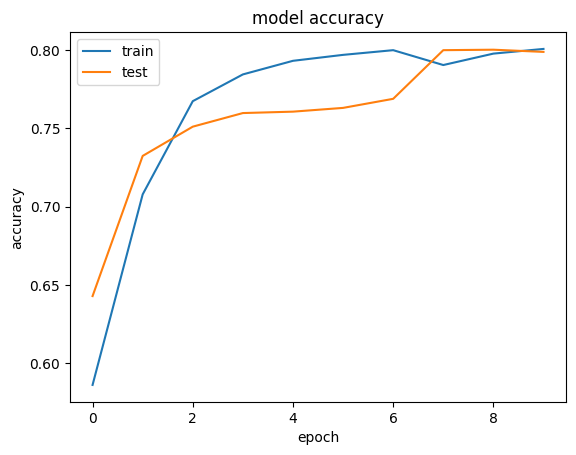

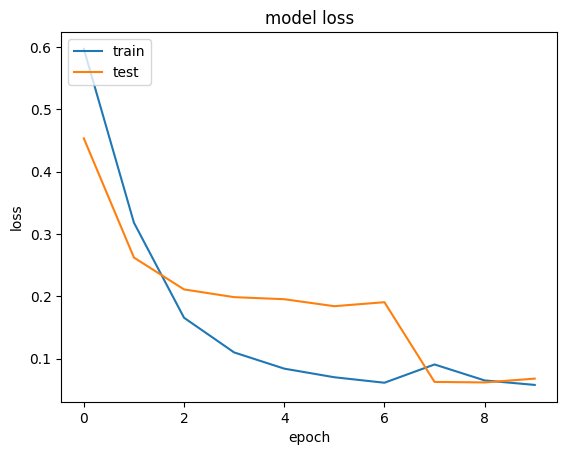

In [ ]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [23]:
Bert_model.load_weights('/content/drive/MyDrive/TwitterSentiment/bert_.hdf5')

In [24]:
#label mapping
label_map = {1:'Negative', 2:'Positive', 3:'Neutral', 4:'Irrelevant'}

In [34]:
#prediction on the unseeen data
predictions = Bert_model.predict(valid_dataset.batch(256))
predictions = np.argmax(predictions, axis=1)

56/56 [==============================] - 117s 2s/step


In [31]:
predictions = [label_map[val] for val in predictions]
encoding_label = [label_map[val] for val in y_val]

In [59]:
#classification report for the val set
print("Test Set - Classification Report:\n",
      classification_report(predictions, encoding_label))

Test Set - Classification Report:
               precision    recall  f1-score   support

  Irrelevant       0.83      0.79      0.81      2661
    Negative       0.85      0.87      0.86      3879
     Neutral       0.86      0.88      0.87      4251
    Positive       0.85      0.85      0.85      3541

    accuracy                           0.85     14332
   macro avg       0.85      0.84      0.85     14332
weighted avg       0.85      0.85      0.85     14332



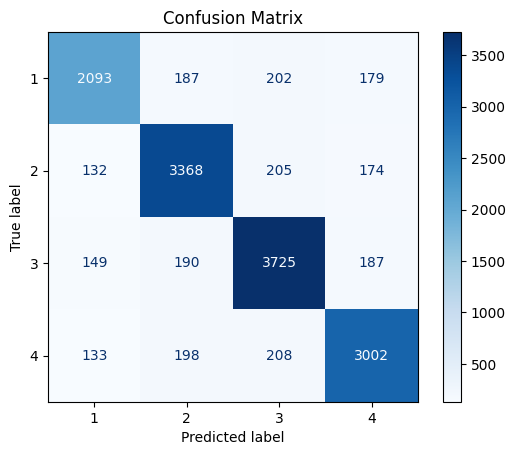

In [60]:
#plot confusion matrix for the test set
confusion_mat = confusion_matrix(predictions, encoding_label)

train_display = ConfusionMatrixDisplay(confusion_matrix=confusion_mat, display_labels=list(label_map.keys()))
train_display.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.grid(False)
plt.show()